Wherein I save oscillon images at various stages of its oscillation to use for collisions.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os, struct

In [33]:
# from utils.extract_utils import *
from utils.latticeeasy import *
from utils.oscillons import get_oscillon_coms
# from utils.gradient_utils import gradient_discrete
from utils.label_utils import get_labels, label_blobs
from utils.gmon import get_mass

In [34]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 11})
rc('text', usetex=True)
rc('image', cmap='gist_heat_r')
rc('axes', **{'titlesize': 11})

plt.rcParams['axes.axisbelow'] = True

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load data

In [35]:
output_dir = "/media/yangelaxue/TRANSFER/Colliding_Oscillons/alpha_beta-0.5_50_250.804626/osc2_128_v2/highres_time_128/"
data = LATTICEEASY(output_dir)
data.__dict__

{'output_dir': '/media/yangelaxue/TRANSFER/Colliding_Oscillons/alpha_beta-0.5_50_250.804626/osc2_128_v2/highres_time_128/',
 'alpha': 0.5,
 'beta': 50.0,
 'phi_0': 0.118201,
 'dt_pr': 0.001,
 'domain_width_pr': array([0.365995, 0.365995, 0.365995]),
 'domain_dimensions': (128, 128, 128),
 't': array([ 0.499997,  1.500014,  2.000037,  2.999965,  3.999892,  4.99982 ,
         5.999747,  6.999675,  7.999603,  8.499805,  9.000008,  9.50021 ,
        10.000412, 10.500614, 11.000816, 11.501019, 12.001221, 12.501423,
        13.001625, 13.501827, 14.002029, 14.502232, 15.002434, 15.502636,
        16.002834, 17.002285, 18.001736, 19.001186, 20.000637, 21.000088,
        21.999538, 22.998989, 23.99844 , 24.99789 , 25.997341, 26.00034 ]),
 '_slice_tidx': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 'a': array([10.73867, 10.73867, 10.73867, 10.73867, 10.73867, 10.73867,
  

In [36]:
timeslices = [i for i in range(0,data.t.size,1)]

In [37]:
phi_gen = (load_phi(output_dir,data.domain_dimensions,timeslice) for timeslice in timeslices)
phip_gen = (load_phip(output_dir,data.domain_dimensions,timeslice) for timeslice in timeslices)

phi_amp = []
phip_amp = []
for i, (phi, phip) in enumerate(zip(phi_gen,phip_gen)):
    
    print(f"{i}/{len(timeslices)}")
    
    Edens = get_Edens_pr(
        phi, phip, data.a[timeslices[i]], data.ap[timeslices[i]],
        data.alpha, data.beta, data.phi_0, data.domain_width_pr/data.domain_dimensions
    )
    com_idx = np.round([(Edens*x_idx).sum()/Edens.sum() for x_idx in np.indices(data.domain_dimensions)])
    com_idx = tuple(com_idx.astype(int))
    phi_amp.append(phi[com_idx])
    phip_amp.append(phip[com_idx])

0/36
1/36
2/36
3/36
4/36
5/36
6/36
7/36
8/36
9/36
10/36
11/36
12/36
13/36
14/36
15/36
16/36
17/36
18/36
19/36
20/36
21/36
22/36
23/36
24/36
25/36
26/36
27/36
28/36
29/36
30/36
31/36
32/36
33/36
34/36
35/36


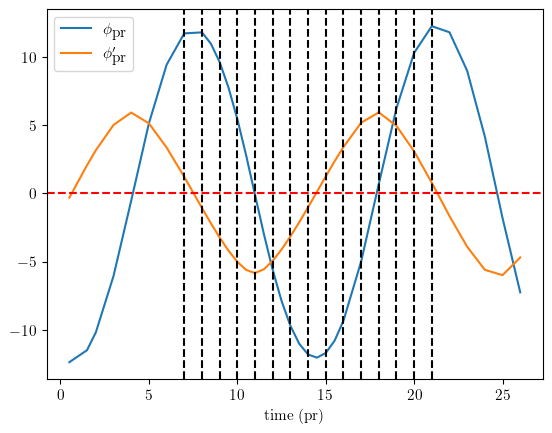

In [40]:
times_ex = [7,8,10,12,14,16,18,20,22,24,25,26,27,28,29]

plt.plot(data.t[timeslices], phi_amp, label=r"$\phi_{\textrm{pr}}$")
plt.plot(data.t[timeslices], phip_amp, label=r"$\phi_{\textrm{pr}}'$")

for time_ex in times_ex:
    plt.axvline(data.t[time_ex],ls='--',c='k')
plt.axhline(0, ls='--', c='r')

plt.xlabel("time (pr)")
plt.legend()
plt.show()

In [49]:
T_pr = data.t[times_ex[-1]]-data.t[times_ex[0]]
# times_ex = [i for i in range(10,31)]
# times_ex = [10,12,14,16,18,20,22,24,25,26,27,28,29,30]
# print(data.t[times_ex[1]]-data.t[times_ex[0]])

T_pr, data.t[times_ex]

(14.000413000000002,
 array([ 6.999675,  7.999603,  9.000008, 10.000412, 11.000816, 12.001221,
        13.001625, 14.002029, 15.002434, 16.002834, 17.002285, 18.001736,
        19.001186, 20.000637, 21.000088]))

In [42]:
mass = get_mass(data.alpha,data.beta)

omega_pr = mass/(data.rescale_B*data.a[0]**data.rescale_s)
T_approx = 2*np.pi/omega_pr

T_approx

12.395807480182734

In [43]:
print(np.array(phi_amp)[times_ex])
print(np.array(phip_amp)[times_ex])

[ 11.72423    11.79645     9.623098    5.44868    -0.1027798  -5.607951
  -9.702251  -11.80985   -11.69869    -9.332548   -4.99996     0.6897869
   6.240037   10.30167    12.25132  ]
[ 1.207694  -1.070224  -3.240325  -5.017337  -5.839714  -4.942785
 -3.157361  -1.020375   1.246148   3.392643   5.174352   5.932966
  4.945306   3.077681   0.7733846]


# Save as .img

In [44]:
phi_list = [load_phi(output_dir,data.domain_dimensions,timeslice) for timeslice in times_ex]
phip_list = [load_phip(output_dir,data.domain_dimensions,timeslice) for timeslice in times_ex]

In [45]:
shape_i = (128,128,128)

if shape_i==data.domain_dimensions:
    print("No interpolation")
else:
    for i, (phi, phip) in enumerate(zip(phi_list, phip_list)):
        phi_i, phip_i = interpolate(shape_i,phi,phip)
        phi_list[i] = phi_i
        phip_list[i] = phip_i

No interpolation


In [46]:
dt_pr = data.dt_pr

phi_adv_list = [phi + dt_pr/2*phip for phi, phip in zip(phi_list, phip_list)]

In [47]:
N = shape_i[0]
n_points = N*N*N

# titles = ["peak", "peak+0.25T4", "peak+0.5T", "peak+0.75T", "peak+T"]
titles = [f"peak+{i}" for i in range(len(times_ex))]
# titles = ["peak"]

for i, (phi, phip) in enumerate(zip(phi_adv_list, phip_list)):
    fname_o = f"{titles[i]}.img"
    datname_o = f"{titles[i]}.dat"
    fdir = f"{titles[i]}"

    if not os.path.exists(os.path.join(output_dir, fdir)):
        os.makedirs(os.path.join(output_dir, fdir))

    with open(os.path.join(output_dir, fdir, datname_o), 'w') as dat:
        dat.write(f"N = {phi.shape}\n")
        dat.write(f"L_pr = {data.domain_width_pr}\n")
        dat.write(f"dt_pr = {dt_pr}\n")
        dat.write(f"alpha = {data.alpha}\n")
        dat.write(f"beta = {data.beta}\n")
        dat.write(f"f0 = {data.phi_0}\n")
        dat.write(f"\n")

#         dat.write(f"Spatial resolution change {data.domain_dimensions} -> {shape_i}\n")
#         dat.write(f"Temporal resolution change {data.dt_pr} -> {dt_pr}\n")
#         dat.write(f"Run simulations from t_pr = {data.t[timeslice]}\n")
        dat.write(f"output_dir = {os.path.join(output_dir, fdir)}\n")

    with open(os.path.join(output_dir, fdir, fname_o),'wb') as f_o:

        f_o.write(struct.pack('<i',-1))
        f_o.write(struct.pack('<f',0))
        f_o.write(struct.pack('<f',data.a[times_ex[i]]))
        f_o.write(struct.pack('<f',data.ap[times_ex[i]]))

        f_o.write(struct.pack('<'+'f'*n_points,*phi.flatten()))
        f_o.write(struct.pack('<'+'f'*n_points,*phip.flatten()))

In [48]:
titles

['peak+0',
 'peak+1',
 'peak+2',
 'peak+3',
 'peak+4',
 'peak+5',
 'peak+6',
 'peak+7',
 'peak+8',
 'peak+9',
 'peak+10',
 'peak+11',
 'peak+12',
 'peak+13',
 'peak+14']